<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 155.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 192.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 130.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
missing_counts = df[['Employment','JobSat','RemoteWork']].isnull().sum()
print (missing_counts)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
# Convert 'YearsCodePro' to numeric (handling non-numeric values)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Converts non-numeric values to NaN

# Define experience bins and labels
bins = [0, 5, 10, 20, float('inf')]  # Last bin covers all values >20
labels = ['0-5', '5-10', '10-20', '>20']

# Categorize experience into bins
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
# Display first few rows
print(df[['YearsCodePro', 'ExperienceRange']].head())

   YearsCodePro ExperienceRange
0           NaN             NaN
1          17.0           10-20
2          27.0             >20
3           NaN             NaN
4           NaN             NaN


In [7]:
# Categorize experience into bins
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Convert 'JobSat' to numeric if necessary (assuming it's stored as categorical or ordinal values)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

# Display results
print(median_job_sat)

ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_300/1037429046.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


/tmp/ipykernel_300/4132017816.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange', as_index=False)['JobSat'].median()
/tmp/ipykernel_300/4132017816.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_job_sat, x='ExperienceRange', y='JobSat', palette='Blues_r')


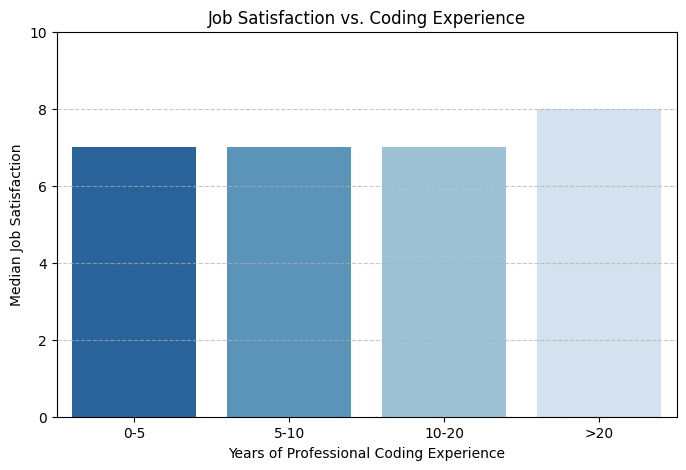

In [8]:
import seaborn as sns
# Convert 'YearsCodePro' and 'JobSat' to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Define experience bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

# Categorize experience into bins
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat and convert to DataFrame
median_job_sat = df.groupby('ExperienceRange', as_index=False)['JobSat'].median()

# Plot the relationship using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=median_job_sat, x='ExperienceRange', y='JobSat', palette='Blues_r')

# Customize the plot
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction vs. Coding Experience')
plt.ylim(0, 10)  # Assuming JobSat is on a scale of 1-10
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/527898975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Blues_r')


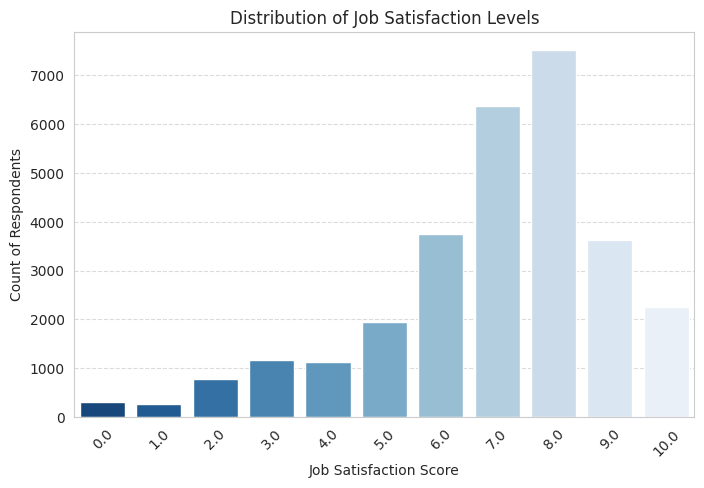

In [9]:
# Convert 'JobSat' to numeric (if applicable)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Set plot style
sns.set_style("whitegrid")

# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='Blues_r')

# Customize plot
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count of Respondents')
plt.title('Distribution of Job Satisfaction Levels')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


/tmp/ipykernel_300/2018115320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='coolwarm')# Customize plot


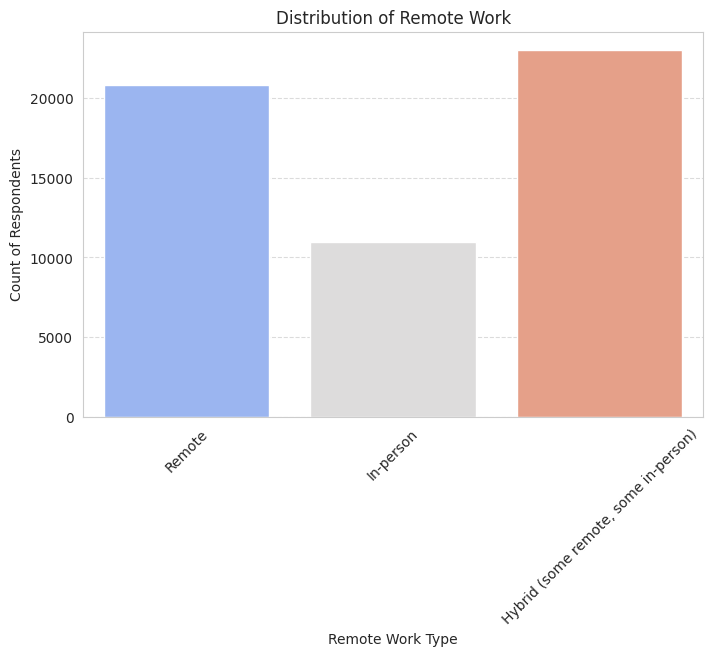

In [10]:

# Check unique values in RemoteWork
print(df['RemoteWork'].unique())

# Drop missing values (if necessary)
df = df.dropna(subset=['RemoteWork'])

# Set plot style
sns.set_style("whitegrid")

# Create count plot for RemoteWork
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='coolwarm')# Customize plot
plt.xlabel('Remote Work Type')
plt.ylabel('Count of Respondents')
plt.title('Distribution of Remote Work')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [11]:
# Print column names to identify correct column names
print(df.columns)

# Update column names based on actual dataset
remote_col = 'RemoteWork'  # Adjust if necessary
employment_col = 'Employment'  # Adjust if necessary
job_role_col = 'Jobrole'  # Adjust if necessary

# Drop missing values in key columns
df = df.dropna(subset=[remote_col, employment_col, job_role_col])

# Set plot style
sns.set_style("whitegrid")

# Count Plot for Remote Work Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=remote_col, palette='coolwarm')

# Customize plot
plt.xlabel('Remote Work Type')
plt.ylabel('Count of Respondents')
plt.title('Distribution of Remote Work Preferences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Create cross-tabulations
remote_work_by_employment = pd.crosstab(index=df[employment_col], columns=df[remote_col])
remote_work_by_jobrole = pd.crosstab(index=df[job_role_col], columns=df[remote_col])

# Display cross-tabulated tables
print("\nRemote Work Distribution by Employment Type:\n", remote_work_by_employment)
print("\nRemote Work Distribution by Job Role:\n", remote_work_by_jobrole)

# Heatmap for Employment Type vs. Remote Work
plt.figure(figsize=(10, 6))
sns.heatmap(remote_work_by_employment, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Type')
plt.ylabel('Employment Type')
plt.show()

# Heatmap for Job Role vs. Remote Work
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_jobrole, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Remote Work Type')
plt.ylabel('Job Role')
plt.show()

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)


KeyError: ['Jobrole']

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [14]:
# Filter data by region (assuming 'Country' or similar column is present)
region_column = 'Country'  # Update if necessary
language_column = 'LanguageHaveWorkedWith'  # Update if necessary

# Drop rows where the region or language column is missing
df = df.dropna(subset=[region_column, language_column])

# Example: Filter by a specific region or country, e.g., 'United States'
filtered_df = df[df[region_column] == 'United States']  # Change this to another region if necessary

# Split the languages column into individual languages
# Assuming the languages are stored as a string (e.g., 'Python, Java, C++')
languages = filtered_df[language_column].str.split(',', expand=True).stack().str.strip()

# Count the occurrences of each language in the filtered data
language_counts = languages.value_counts()

# Show the top programming languages
print(language_counts.head())
## Customize the plot
plt.title('Top Programming Languages in United States')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .str accessor with string values!

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Correlation between YearsCodePro and JobSatPoints_1: -0.03284640929635467


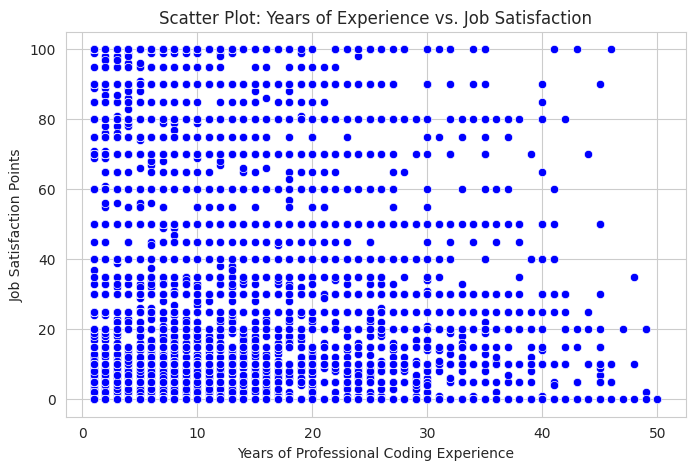

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Inspect columns to check for relevant data
print(df.columns)

# Relevant columns for analysis
experience_col = 'YearsCodePro'  # Years of professional coding experience
satisfaction_col = 'JobSatPoints_1'  # Job satisfaction points (or related column)

# Drop rows with missing values in either of the columns
df = df.dropna(subset=[experience_col, satisfaction_col])

# Convert experience column to numeric if necessary (e.g., for handling 'More than 50 years' type entries)
df[experience_col] = pd.to_numeric(df[experience_col], errors='coerce')

# Drop any remaining missing values
df = df.dropna(subset=[experience_col, satisfaction_col])

# Calculate the correlation
correlation = df[experience_col].corr(df[satisfaction_col])
print(f"Correlation between {experience_col} and {satisfaction_col}: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=experience_col, y=satisfaction_col, color='blue')

# Customize the plot
plt.title('Scatter Plot: Years of Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)

# Show the plot
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [17]:
# Save the modified dataset to a new CSV file
modified_data_url = 'modified_survey_data.csv'
df.to_csv(modified_data_url, index=False)

# Confirm the file has been saved
print(f"Modified dataset has been saved as {modified_data_url}")

Modified dataset has been saved as modified_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
